<a href="https://colab.research.google.com/github/Pranjali012/Spam-or-Ham-Email/blob/main/Spam_or_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Input,LSTM,Dense,Bidirectional,Dropout, Activation
from keras.models import Model
from tensorflow.keras.models import Sequential
tf.__version__
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df=pd.read_csv("/content/drive/MyDrive/spam_ham_dataset.csv")

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on mond...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 ...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - -...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fort...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understandi...,0


In [54]:

df.pop("Unnamed: 0")

df.head()
  

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on mond...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 ...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - -...",0
3,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fort...",1
4,ham,Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understandi...,0


In [55]:
# checking the number of duplicate columns
print('Number of duplicate rows in the data are : ',df[df.duplicated(subset=None, keep='first') == True].shape[0], '\nSo we drop them')

# dropping the duplicate columns
df.drop_duplicates(inplace = True)

Number of duplicate rows in the data are :  178 
So we drop them


In [56]:
df.groupby('label_num').describe()

label  ... text
          count  ... freq
label_num        ...     
0          3531  ...    1
1          1462  ...    1

[2 rows x 8 columns]

In [57]:
df['mail_len'] = df.text.apply(len)

Text(0.5, 0, 'Ham/Spam')

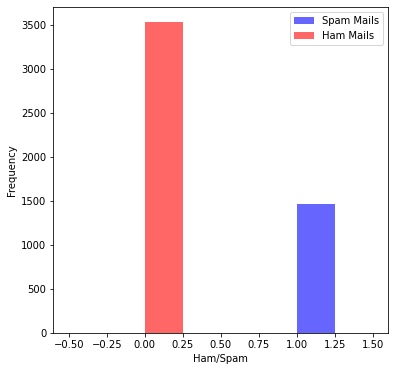

In [58]:
plt.figure(figsize=(6,6))

df.label_num[df.label_num==1].plot(bins=4, kind='hist', color='blue', 
                                       label='Spam Mails', alpha=0.6)

df.label_num[df.label_num==0].plot(bins=4, kind='hist', color='red', 
                                       label='Ham Mails', alpha=0.6)
plt.legend()
plt.xlabel("Ham/Spam")

Text(0.5, 1.0, 'Length Histogram')

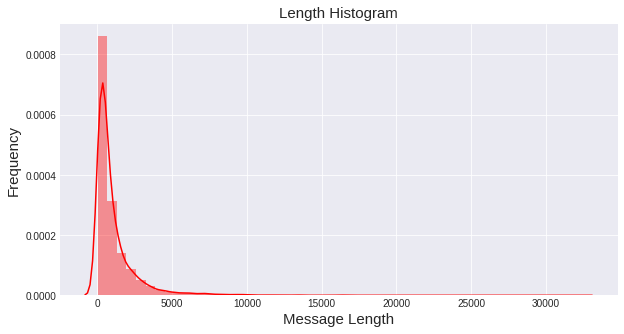

In [59]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(df['mail_len'],kde=True,color='red',hist=True)
plt.xlabel("Message Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

Text(0.5, 0, 'Mail Length')

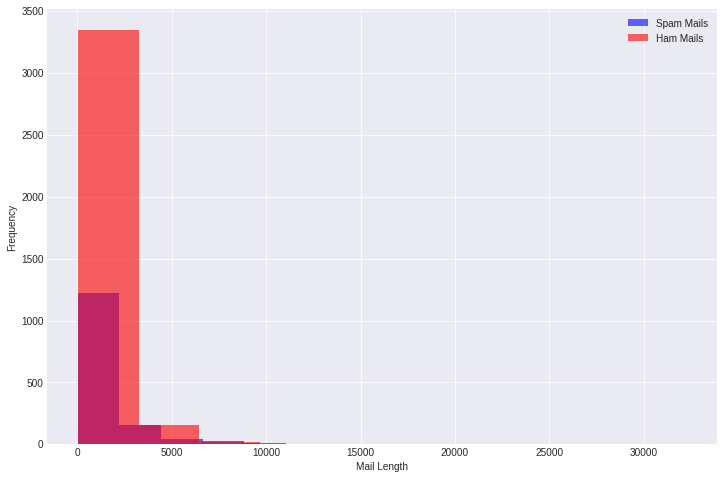

In [60]:
plt.figure(figsize=(12, 8))
df[df.label_num==1].mail_len.plot( kind='hist', color='blue',label='Spam Mails', alpha=0.6)
df[df.label_num== 0].mail_len.plot(kind='hist', color='red',label='Ham Mails', alpha=0.6)
plt.legend()
plt.xlabel("Mail Length")

In [62]:
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).

def process_text(text):
    
    #1 Remove Punctuationa
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [63]:
df.text = df.text.apply(process_text)
df.text.head()

0    [Subject, enron, methanol, meter, 988291, follow, note, gave, monday, 4, 3, 00, preliminary, flo...
1           [Subject, hpl, nom, january, 9, 2001, see, attached, file, hplnol, 09, xls, hplnol, 09, xls]
2    [Subject, neon, retreat, ho, ho, ho, around, wonderful, time, year, neon, leaders, retreat, time...
3    [Subject, photoshop, windows, office, cheap, main, trending, abasements, darer, prudently, fortu...
4    [Subject, indian, springs, deal, book, teco, pvr, revenue, understanding, teco, sends, us, check...
Name: text, dtype: object

In [64]:
vocab_size = 10000
max_len = 250

# Tokenize the mails
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(df.text)

# Use text_to_sequence to convert it into vectors
sequences = tok.texts_to_sequences(df.text)

# pad seqence to create a matrix of equal length mails
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, df.label_num, test_size = 0.25, random_state = 1)

In [76]:
models=[RandomForestClassifier(),
        GaussianNB(),
        AdaBoostClassifier(),
        xgboost.XGBClassifier(),
        svm.SVC(),
        tree.DecisionTreeClassifier(),
        KNeighborsClassifier()]

model_names=['Random Forest Classifier',
             'Gaussian Naive Bayes Classifier',
             'Adaboost Classifier',
             'XGBoost Classifier',
             'Support Vector Classifier',
             'Decision Tree Classifier',
             'K Nearest Neighbour Classifier']
accuracy=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
d={'Modelling Algo':model_names,'Accuracy':accuracy} 

In [77]:
accuracy_frame=pd.DataFrame.from_dict(d, orient='index').transpose()
accuracy_frame

,Modelling Algo,Accuracy
0,Random Forest Classifier,0.847078
1,Gaussian Naive Bayes Classifier,0.680544
2,Adaboost Classifier,0.826261
3,XGBoost Classifier,0.855885
4,Support Vector Classifier,0.803042
5,Decision Tree Classifier,0.77502
6,K Nearest Neighbour Classifier,0.772618


In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

In [79]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [80]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = xgboost.XGBClassifier()
# Random search of parameters, using 2 fold cross validation, 
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                               

In [82]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [83]:
rf_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=1,
              min_samples_split=5, missing=None, n_estimators=1400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
rfc = rf_random.best_estimator_
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test) 
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[828  70]
 [ 93 258]]
0.8694955964771818
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       898
           1       0.79      0.74      0.76       351

    accuracy                           0.87      1249
   macro avg       0.84      0.83      0.84      1249
weighted avg       0.87      0.87      0.87      1249



In [85]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred1)
auc_roc

0.8285458664077818

In [89]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8285458664077818

Text(0.5, 0, 'False Positive Rate')

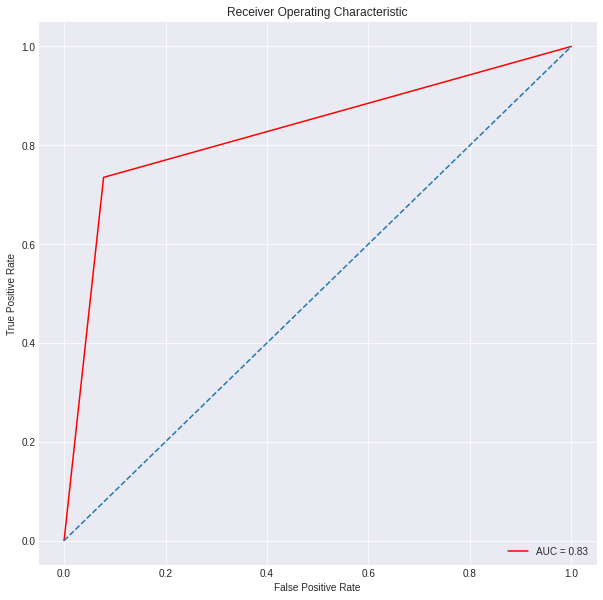

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [91]:
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 200)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                29824     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,029,857
Trainable params: 2,029,857
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
59/59 [==============================] - 16s 223ms/step - loss: 0.3537 - accuracy: 0.8467 - val_loss: 0.1291 - val_accuracy: 0.9696
Epoch 2/5
59/59 [==============================] - 13s 216ms/step - loss: 0.0630 - accuracy: 0.9856 - val_loss: 0.0756 - val_accuracy: 0.9752
Epoch 3/5
59/59 [==============================] - 13s 215ms/step - loss: 0.0212 - accuracy: 0.9965 - val_loss: 0.0608 - val_accuracy: 0.9784
Epoch 4/5
59/59 [==============================] - 13s 215ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 5/5
59/59 [==============================] - 13s 214ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.0549 - val_accuracy: 0.9832


In [93]:
scores = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict_classes(X_test)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('confusion matrix:\n', confusion_matrix(y_pred,y_test))

Test loss: 0.05487058684229851
Test accuracy: 0.9831865429878235
confusion matrix:
 [[883   6]
 [ 15 345]]
